In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [2]:
# Read the Excel file
df = pd.read_excel('Salary_MIS.xlsx')
df

,Salary,GPA,MIS,Statistics
0,72,3.53,1,0
1,66,2.86,1,0
2,72,3.69,0,0
3,63,3.24,0,0
4,65,3.21,0,0
...,...,...,...,...
115,66,3.27,0,0
116,63,2.86,1,0
117,78,3.04,1,1
118,64,2.99,0,0


In [3]:
# Create the decision tree model
features = ['GPA', 'MIS', 'Statistics']
target = 'Salary'

In [4]:
dt = DecisionTreeRegressor()


In [5]:
# Fit the model
dt.fit(df[features], df[target])

# Print the summary of the decision tree model
print(f'Feature importances: {dt.feature_importances_}')
print(f'Number of nodes: {dt.tree_.node_count}')
print(f'Max depth of tree: {dt.tree_.max_depth}')

Feature importances: [0.4405971  0.19304548 0.36635743]
Number of nodes: 191
Max depth of tree: 13


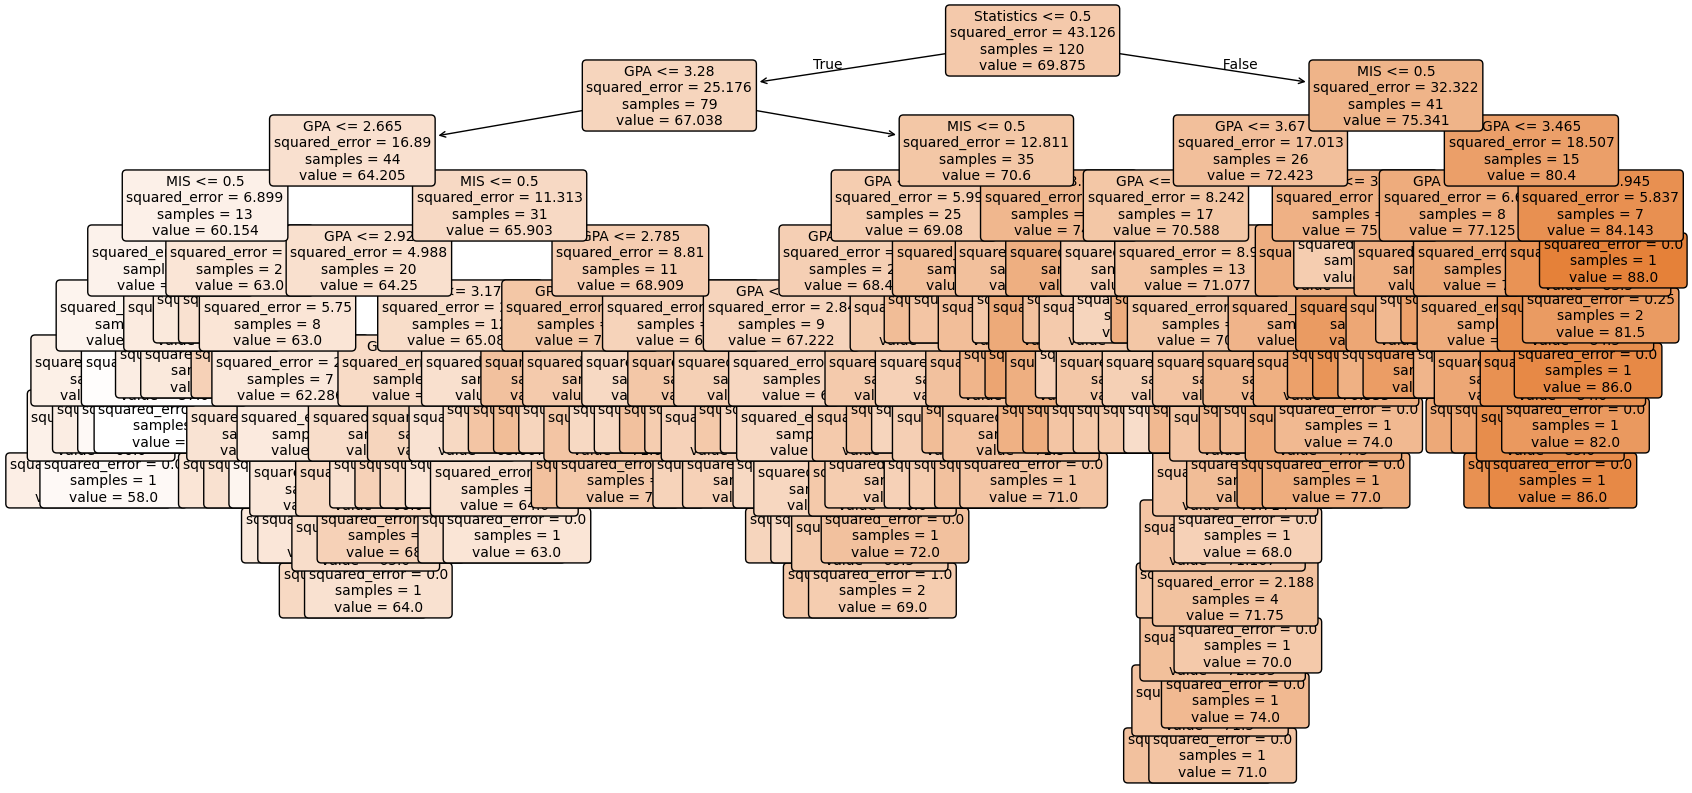

In [6]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.show()

In [7]:
def transformer(df):
    df = df.copy()
    return df
    

In [8]:
from mlModelSaver import MlModelSaver
mlModelSaverInstance = MlModelSaver({
    "baseRelativePath": "../../..",
    "modelsFolder": "models"
})

loadedModel = mlModelSaverInstance.exportModel(
    dt,
    {
        "modelName": "003-dt-regressor",
        "description": "003-dt-regressor",
        "modelType": "sklearn.tree.DecisionTreeRegressor",
        "inputs": [
            {
                "name": "GPA",
                "type": "float"
            },
            {
                "name": "MIS",
                "type": "binary"
            },
            {
                "name": "Statistics",
                "type": "binary"
            },
        ],
        "transformer": transformer,
        "outputs": [
            {
                "name": "Salary",
                "type": "float"
            }
        ]
    }
)
loadedModel

DecisionTreeRegressor()

In [9]:

testData = [{
    "GPA": 3.53,
    "MIS": 1,
    "Statistics": 0
}]

# Create a DataFrame from the dictionary
testDf = pd.DataFrame(testData)


In [10]:
dt.predict( transformer(testDf))

array([72.])

In [11]:
loadedModel.mlModelSavePredict(testDf)

[{'Salary': 72.0}]